In [2]:
!pip install open3d

  Obtaining dependency information for open3d from https://files.pythonhosted.org/packages/43/ee/1c0f25a57b43849fb9f1e773e5c065aa3363b49313bdbdfb7b35337bbab3/open3d-0.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached open3d-0.18.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for dash>=2.6.0 from https://files.pythonhosted.org/packages/b0/68/781d0026a100106b64e4501c76621dfcd0d3c29a546094fcffaa73037a74/dash-2.16.1-py3-none-any.whl.metadata
  Using cached dash-2.16.1-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for configargparse from https://files.pythonhosted.org/packages/6f/b3/b4ac838711fd74a2b4e6f746703cf9dd2cf5462d17dac07e349234e21b97/ConfigArgParse-1.7-py3-none-any.whl.metadata
  Using cached ConfigArgParse-1.7-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/

In [35]:
!pip install torchinfo

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata


In [18]:
## point cloud visualization

In [8]:
import open3d as o3d

current_dir = os.path.join(os.getcwd(), 'DL4')
DATA_DIR = os.path.join(current_dir, "ModelNet10")
# Path to the .off file
off_file_path = DATA_DIR+"/chair/train/chair_0003.off"
print(off_file_path)

# Load the .off file using Open3D
mesh = o3d.io.read_triangle_mesh(off_file_path)

# Convert the mesh to a point cloud
point_cloud = mesh.sample_points_uniformly(number_of_points=10000)  # Adjust the number of points as needed

# Count the number of points in the point cloud
num_points = len(point_cloud.points)

print("Number of points:", num_points)

# Visualize the point cloud
o3d.visualization.draw_geometries([point_cloud], width=800, height=600)

#o3d.visualization.draw(point_cloud,   width=800, height=600 )


C:\Users\Vedha\My project (IIT)\DL_2\DL4\ModelNet10/chair/train/chair_0003.off
Number of points: 10000


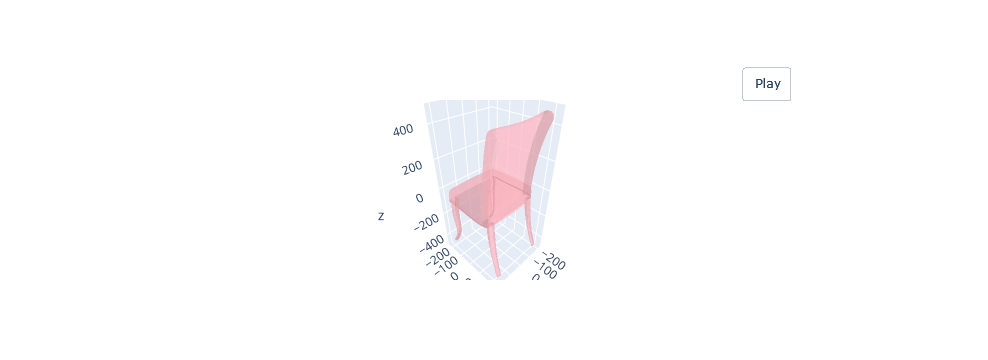

In [4]:
import os
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

def read_off(file):
    if 'OFF' != file.readline().strip():
        raise('Not a valid OFF header')
    n_verts, n_faces, __ = tuple([int(s) for s in file.readline().strip().split(' ')])
    verts = [[float(s) for s in file.readline().strip().split(' ')] for i_vert in range(n_verts)]
    faces = [[int(s) for s in file.readline().strip().split(' ')][1:] for i_face in range(n_faces)]
    return verts, faces
     

current_dir = os.path.join(os.getcwd(), 'DL4')
DATA_DIR = os.path.join(current_dir, "ModelNet10")
off_file_path = os.path.join(DATA_DIR, "chair/train/chair_0003.off")

with open(off_file_path, 'r') as f:
  verts, faces = read_off(f)
     

i,j,k = np.array(faces).T
x,y,z = np.array(verts).T

def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames=[]

    def rotate_z(x, y, z, theta):
        w = x+1j*y
        return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))
    fig = go.Figure(data=data,
                    layout=go.Layout(
                        updatemenus=[dict(type='buttons',
                                    showactive=False,
                                    y=1,
                                    x=0.8,
                                    xanchor='left',
                                    yanchor='bottom',
                                    pad=dict(t=45, r=10),
                                    buttons=[dict(label='Play',
                                                    method='animate',
                                                    args=[None, dict(frame=dict(duration=50, redraw=True),
                                                                    transition=dict(duration=0),
                                                                    fromcurrent=True,
                                                                    mode='immediate'
                                                                    )]
                                                    )
                                            ]
                                    )
                                ]
                    ),
                    frames=frames
            )

    return fig
     

visualize_rotate([go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50, i=i,j=j,k=k)]).show()
     


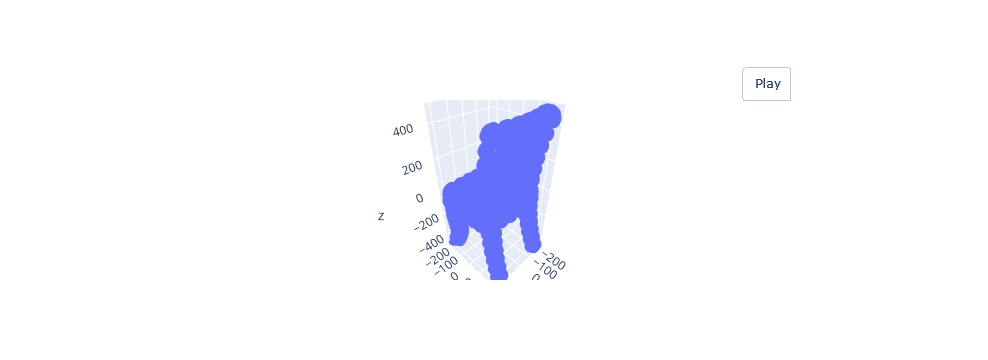

In [5]:
visualize_rotate([go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')]).show()

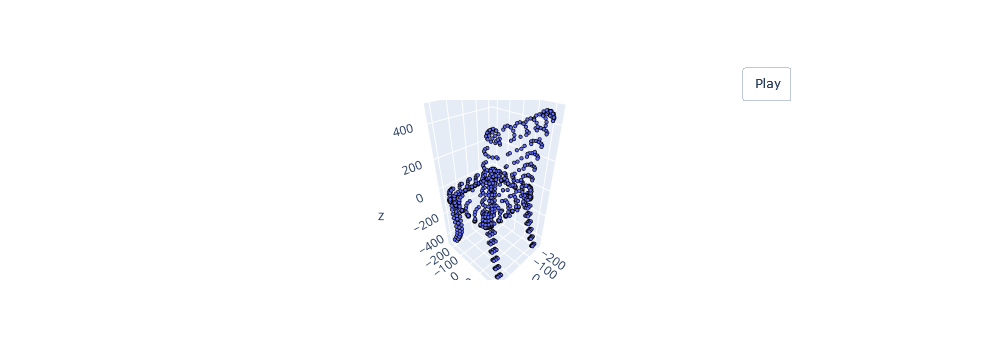

In [6]:
def pcshow(xs,ys,zs):
    data=[go.Scatter3d(x=xs, y=ys, z=zs,
                                   mode='markers')]
    fig = visualize_rotate(data)
    fig.update_traces(marker=dict(size=2,
                      line=dict(width=2,
                      color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.show()
    
pcshow(x,y,z)    